<a href="https://www.kaggle.com/code/laxmivatsalyadaita/muffin-chihuahua?scriptVersionId=148053003" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import pandas as pd
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
train = pd.DataFrame(columns = ['label','path'])
test = pd.DataFrame(columns = ['label', 'path'])

In [4]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths = dirname.split('/')
        batch = paths[-2]
        label = paths[-1]
        file_path = os.path.join(dirname,filename)
        
        dic = {'label': label, 'path': file_path}
        if batch == 'test':
            test.loc[len(test)] = dic
            
        elif batch == 'train':
            train.loc[len(train)] = dic

In [5]:
test.sample(5)

,label,path
1068,chihuahua,/kaggle/input/muffin-vs-chihuahua-image-classi...
454,muffin,/kaggle/input/muffin-vs-chihuahua-image-classi...
315,muffin,/kaggle/input/muffin-vs-chihuahua-image-classi...
55,muffin,/kaggle/input/muffin-vs-chihuahua-image-classi...
103,muffin,/kaggle/input/muffin-vs-chihuahua-image-classi...


In [6]:
train.sample(5)

,label,path
2329,chihuahua,/kaggle/input/muffin-vs-chihuahua-image-classi...
2201,chihuahua,/kaggle/input/muffin-vs-chihuahua-image-classi...
806,muffin,/kaggle/input/muffin-vs-chihuahua-image-classi...
3488,chihuahua,/kaggle/input/muffin-vs-chihuahua-image-classi...
2023,muffin,/kaggle/input/muffin-vs-chihuahua-image-classi...


Text(0.5, 1.0, 'Muffin/Chihuahua in train set')

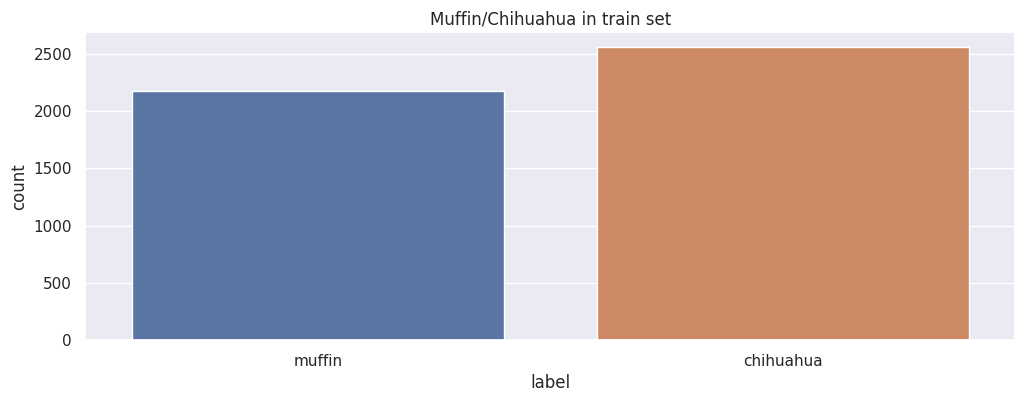

In [7]:
plt.figure(figsize = (12,4))
sns.countplot(data = train, x = 'label')
plt.title("Muffin/Chihuahua in train set")

Text(0.5, 1.0, 'Muffin/Chihuahua in test set')

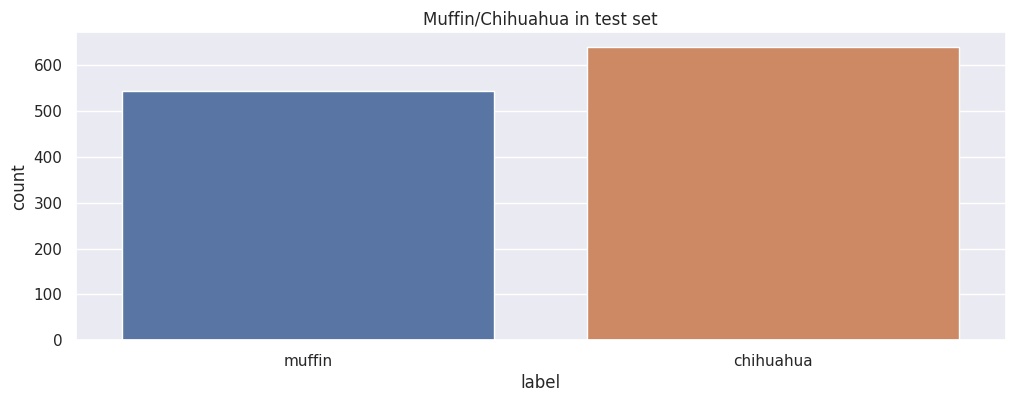

In [8]:
plt.figure(figsize = (12,4))
sns.countplot(data = test, x = 'label')
plt.title("Muffin/Chihuahua in test set")

In [9]:
datapath = "/kaggle/input/muffin-vs-chihuahua-image-classification/"
CATEGORIES = ["chihuahua", "muffin"]

In [10]:
training = []
dataset = "train/"
def createTrainingData():
    for category in CATEGORIES:
        path = datapath+dataset+category
        print(path)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(200,200))
            training.append([new_array, class_num])

In [11]:
testing = []
dataset = "test/"
def createTestingData():
    for category in CATEGORIES:
        path = datapath+dataset+category
        print(path)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(200,200))
            testing.append([new_array, class_num])

In [12]:
createTrainingData()

/kaggle/input/muffin-vs-chihuahua-image-classification/test/chihuahua
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin


In [13]:
createTestingData()

/kaggle/input/muffin-vs-chihuahua-image-classification/test/chihuahua
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin


In [14]:
len(testing)

1184

In [15]:
len(training)

1184

In [16]:
import random
random.shuffle(training)

In [17]:
random.shuffle(testing)

In [18]:
x = []
y = []
for features, label in training:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1,200,200,3)

In [19]:
x_test = []
y_test = []
for features, label in training:
    x_test.append(features)
    y_test.append(label)
x_test = np.array(x_test).reshape(-1,200,200,3)

In [20]:
max(y)

1

In [21]:
max(y_test)

1

In [22]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [23]:
x = x.astype('float32')
x /= 255
from keras.utils import np_utils
y = np_utils.to_categorical(y,2)
print(y[100])
print(np.shape(y))

[1. 0.]
(1184, 2)


In [24]:
x_test = x_test.astype('float32')
x_test /= 255
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_test,2)
print(y_test[100])
print(np.shape(y_test))

[1. 0.]
(1184, 2)


In [25]:
x

array([[[[0.8235294 , 0.6901961 , 0.7294118 ],
         [0.81960785, 0.6862745 , 0.7254902 ],
         [0.8156863 , 0.68235296, 0.7254902 ],
         ...,
         [0.74509805, 0.7529412 , 0.8235294 ],
         [0.8       , 0.79607844, 0.8509804 ],
         [0.84705883, 0.827451  , 0.87058824]],

        [[0.81960785, 0.6862745 , 0.7294118 ],
         [0.8117647 , 0.6745098 , 0.72156864],
         [0.80784315, 0.67058825, 0.7254902 ],
         ...,
         [0.7294118 , 0.74509805, 0.81960785],
         [0.78431374, 0.78431374, 0.8509804 ],
         [0.81960785, 0.8117647 , 0.85882354]],

        [[0.80784315, 0.67058825, 0.7254902 ],
         [0.8039216 , 0.6627451 , 0.7254902 ],
         [0.8       , 0.65882355, 0.7254902 ],
         ...,
         [0.72156864, 0.7372549 , 0.83137256],
         [0.7647059 , 0.77254903, 0.84705883],
         [0.78039217, 0.78039217, 0.84313726]],

        ...,

        [[0.627451  , 0.6       , 0.68235296],
         [0.56078434, 0.53333336, 0.6156863 ]

In [26]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [27]:
batch_size = 1
nb_classes =6
nb_epochs = 15
img_rows, img_columns = 200, 200
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [28]:
import tensorflow as tf
tf.config.list_physical_devices(
    device_type=None
)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [29]:
from keras import backend as K 
K.clear_session()
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(6,  activation=tf.nn.softmax)
    ])
model.summary()   


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 16)       0

In [30]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [31]:
#model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#model.fit(x, y, batch_size = batch_size, epochs = nb_epochs, callbacks=my_callbacks,verbose = 1, validation_data = (x_test, y_test))